# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\sator\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\sator\anaconda3\envs\pyvizen

In [7]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('news_api')

In [9]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [10]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')

In [11]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')

In [12]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)

btc_df.head()

date                                               text  compound  \
0  2021-10-06  <ul><li>Bitcoin, in terms of market value, ros...    0.3400   
1  2021-10-04  JPMorgan CEO Jamie Dimon is still not a Bitcoi...   -0.2411   
2  2021-10-06  How high are the chances of Bitcoin sustaining...    0.4939   
3  2021-10-10  Specifically, why did someone make a massive p...    0.5461   
4  2021-10-28  Theres a big new presence slurping up power fr...    0.3612   

   positive  negative  neutral  
0     0.076     0.000    0.924  
1     0.000     0.116    0.884  
2     0.219     0.000    0.781  
3     0.121     0.000    0.879  
4     0.096     0.000    0.904

In [13]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)

eth_df.head()

date                                               text  compound  \
0  2021-10-16  A new cross-chain bridge is currently connecte...    0.0000   
1  2021-10-14  Mark Cuban has some advice for people who are ...    0.0000   
2  2021-10-11  An immersive art installation, which will be c...    0.0000   
3  2021-10-12  Coinbase NFT\r\nRobert Nickelsberg/Getty Image...    0.0000   
4  2021-10-22  Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...    0.8225   

   positive  negative  neutral  
0     0.000       0.0    1.000  
1     0.000       0.0    1.000  
2     0.000       0.0    1.000  
3     0.000       0.0    1.000  
4     0.208       0.0    0.792

In [19]:
# Describe the Bitcoin Sentiment
print(f'Bitcoin mean positive score:{btc_df.positive.mean()}')
print(f'Bitcoin highest negative score:{btc_df.negative.max()}')
print(f'Bitcoin highest positve score:{btc_df.positive.max()}')

Bitcoin mean positive score:0.06685
Bitcoin highest negative score:0.116
Bitcoin highest positve score:0.219


In [20]:
# Describe the Ethereum Sentiment
print(f'Ethereum mean positive score:{eth_df.positive.mean()}')
print(f'Ethereum highest negative score:{eth_df.negative.max()}')
print(f'Ethereum highest positve score:{eth_df.positive.max()}')

Ethereum mean positive score:0.036199999999999996
Ethereum highest negative score:0.094
Ethereum highest positve score:0.208


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest negative score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [24]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [80]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    for i in punctuation:
        text = text.replace(i, '')
    
    complier = re.compile('[^a-zA-Z ]')
    text = complier.sub('', text)
    
    # Create a tokenized list of the words
    tokens = word_tokenize(text)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
   
    # Convert the words to lowercase
    tokens = [token.lower() for token in tokens] 
    
    # Remove the stop words
    tokens = [token for token in tokens if token not in sw]
    
    return tokens

In [81]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        tokens = tokenizer(text)
        btc_tokens.append(tokens)
    
    except AttributeError:
        pass

btc_df['tokens'] = btc_tokens
btc_df.head()

date                                               text  compound  \
0  2021-10-06  <ul><li>Bitcoin, in terms of market value, ros...    0.3400   
1  2021-10-04  JPMorgan CEO Jamie Dimon is still not a Bitcoi...   -0.2411   
2  2021-10-06  How high are the chances of Bitcoin sustaining...    0.4939   
3  2021-10-10  Specifically, why did someone make a massive p...    0.5461   
4  2021-10-28  Theres a big new presence slurping up power fr...    0.3612   

   positive  negative  neutral  \
0     0.076     0.000    0.924   
1     0.000     0.116    0.884   
2     0.219     0.000    0.781   
3     0.121     0.000    0.879   
4     0.096     0.000    0.904   

                                              tokens  
0  [ullibitcoin, term, market, value, rose, lilii...  
1  [jpmorgan, ceo, jamie, dimon, still, bitcoin, ...  
2  [high, chance, bitcoin, sustaining, gain, push...  
3  [specifically, someone, make, massive, purchas...  
4  [theres, big, new, presence, slurping, power, ...

In [82]:
# Create a new tokens column for Ethereum
eth_tokens = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        tokens = tokenizer(text)
        eth_tokens.append(tokens)
    
    except AttributeError:
        pass

eth_df['tokens'] = eth_tokens
eth_df.head()

date                                               text  compound  \
0  2021-10-16  A new cross-chain bridge is currently connecte...    0.0000   
1  2021-10-14  Mark Cuban has some advice for people who are ...    0.0000   
2  2021-10-11  An immersive art installation, which will be c...    0.0000   
3  2021-10-12  Coinbase NFT\r\nRobert Nickelsberg/Getty Image...    0.0000   
4  2021-10-22  Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...    0.8225   

   positive  negative  neutral  \
0     0.000       0.0    1.000   
1     0.000       0.0    1.000   
2     0.000       0.0    1.000   
3     0.000       0.0    1.000   
4     0.208       0.0    0.792   

                                              tokens  
0  [new, crosschain, bridge, currently, connected...  
1  [mark, cuban, ha, advice, people, new, investi...  
2  [immersive, art, installation, converted, nfts...  
3  [coinbase, nftrobert, nickelsberggetty, images...  
4  [bitcoin, ethereumnurphoto, getty, imagesif, b...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [83]:
from collections import Counter
from nltk import ngrams

In [84]:
# Generate the Bitcoin N-grams where N=2
btc_bigram = []
for token in btc_tokens:
    btc_bigram.append(list(ngrams(token, n=2)))

In [85]:
# Generate the Ethereum N-grams where N=2
eth_bigram = []
for token in eth_tokens:
    eth_bigram.append(list(ngrams(token, n=2)))

In [86]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [87]:
# Use token_count to get the top 10 words for Bitcoin
btc_token_list = []
for token in btc_tokens:
    for i in token:
        btc_token_list.append(i)
token_count(btc_token_list, 10)

[('bitcoin', 20),
 ('char', 16),
 ('us', 6),
 ('reuters', 6),
 ('high', 4),
 ('representation', 4),
 ('cryptocurrency', 4),
 ('illustration', 4),
 ('taken', 4),
 ('oct', 4)]

In [88]:
# Use token_count to get the top 10 words for Ethereum
eth_token_list = []
for token in eth_tokens:
    for i in token:
        eth_token_list.append(i)
token_count(eth_token_list, 10)

[('char', 20),
 ('bitcoin', 11),
 ('cryptocurrency', 9),
 ('ethereum', 8),
 ('nfts', 6),
 ('illustration', 6),
 ('taken', 6),
 ('ha', 5),
 ('reuters', 5),
 ('representation', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

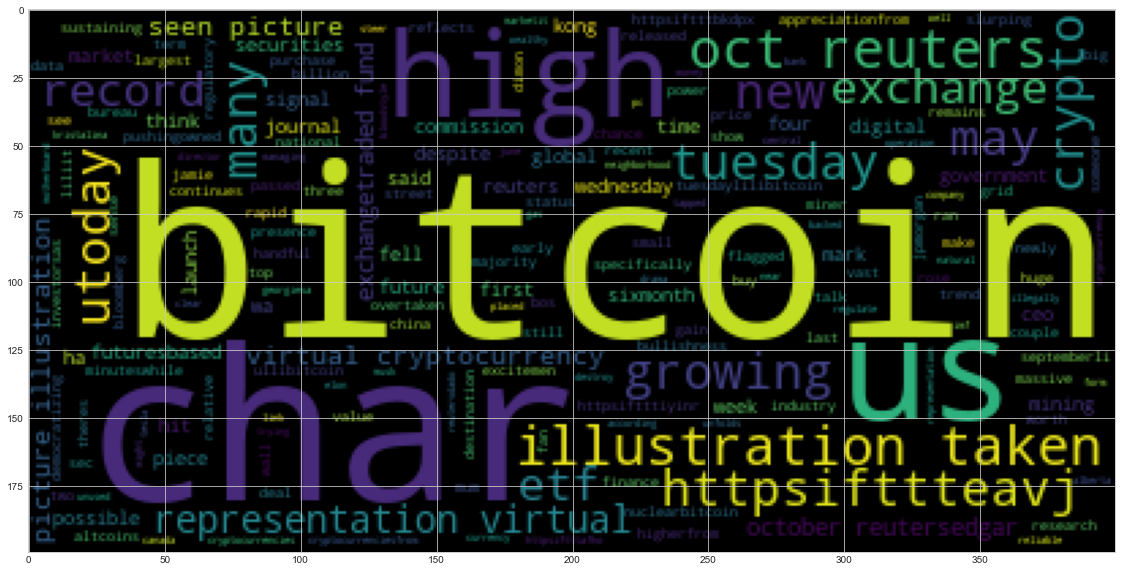

In [92]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(btc_token_list)
btc_wc = WordCloud().generate(btc_string)
plt.imshow(btc_wc)

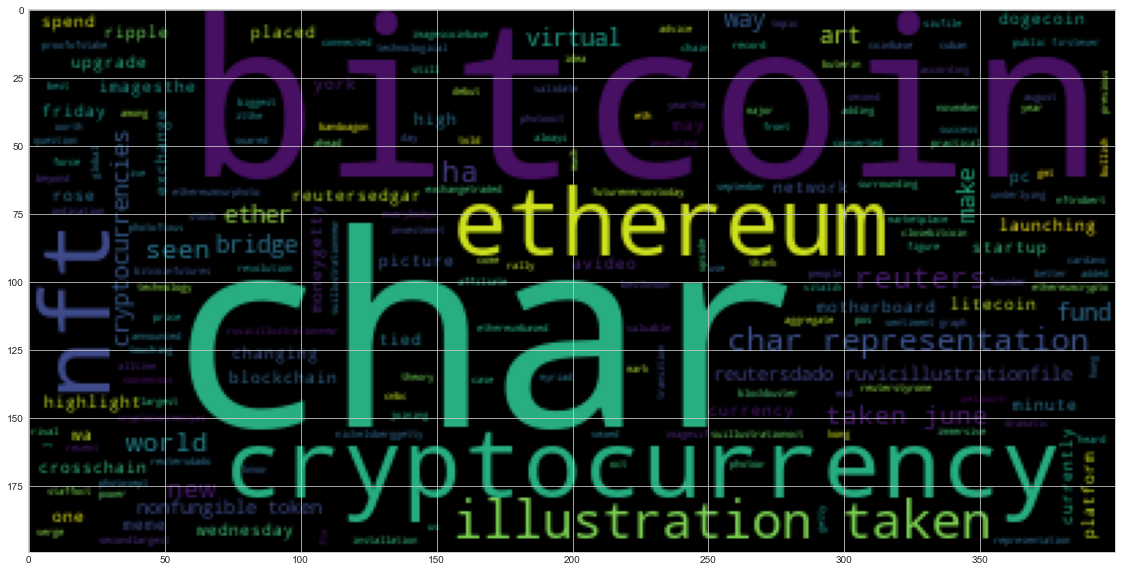

In [93]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_token_list)
eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [95]:
import spacy
from spacy import displacy

In [96]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm


In [97]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [105]:
# Concatenate all of the Bitcoin text together
btc_all_texts = []
for i in range(len(btc_df.index)):
    btc_all_texts.append(btc_df.iloc[i, 1])
btc_all_texts = ' '.join(btc_all_texts)

In [115]:
# Run the NER processor on all of the text
btc_nlp = nlp(btc_all_texts)
# Add a title to the document
btc_nlp.user_data["title"] = "Bitcoin NER"

In [116]:
# Render the visualization
displacy.render(btc_nlp, style='ent')

In [103]:
# List all Entities
for ent in btc_nlp.ents:
    print(ent.text, ent.label_)

4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
JPMorgan ORG
Jamie Dimon PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
U.S. GPE
U.S. GPE
China GPE
Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
SEC ORG
two CARDINAL
Digital ORG
IMF ORG
Kristalina Georgieva PERSON
Elon Musk PERSON
Tuesday DATE
U.S. GPE
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
Securities and Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters 

---

### Ethereum NER

In [117]:
# Concatenate all of the Ethereum text together
eth_all_texts = []
for i in range(len(eth_df.index)):
    eth_all_texts.append(eth_df.iloc[i, 1])
eth_all_texts = ' '.join(eth_all_texts)

In [118]:
# Run the NER processor on all of the text
eth_nlp = nlp(eth_all_texts)

# Add a title to the document
eth_nlp.user_data["title"] = "Ethereum NER"

In [120]:
# Render the visualization
displacy.render(eth_nlp, style='ent')

In [121]:
# List all Entities
for ent in eth_nlp.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Cardano PERSON
Nervos  PERSON
today DATE
the Force Bridge FAC
Mark Cuban PERSON
CNBC ORG
Wednesday DATE
Hong Kong GPE
September 30, 2021 DATE
FTX ORG
NFT ORG
Robert Nickelsberg PERSON
Getty Images ORG
Coinbase Global PERSON
NFT ORG
the end of the year DATE
US GPE
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Oct PERSON
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
Reuters ORG
1 CARDINAL
Reuters ORG
9.46% PERCENT
47,980.97 MONEY
20:12 GMT TIME
Friday DATE
4,146.54 MONEY
June 14, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationOct PERSON
Reuters ORG
7.11% PERCENT
55,162.92 MONEY
20 CARDINAL
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration/File PhotoOct ORG
Reuters ORG
5 CARDINAL
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File ORG
30 CARDINAL
Reuters ORG
5.23% PERCENT
43,716.97 MONEY
22 CARDINAL
NFT ORG
Getty Images PERSON
the minute TIME
Vitalik Buterin PERSON
One year from now DATE
E

---